In [2]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

**Please rate your overall experience with your DEGREE PROGRAM in each of the following areas:(Q3)**

In [3]:
df= pd.read_csv("C:\\Users\\gtang\\Desktop\\MES\\MES_TT.csv")

In [4]:
df.shape

(6329, 34)

In [6]:
#df.dropna(subset=['Q3_1','Q3_2','Q3_3','Q3_4','Q3_5','Q3_6','Q3_7'],axis=0,inplace=True) 

In [7]:
df_empa=df[(df.major=='EMPA')]

In [8]:
df_empa1=df_empa.iloc[:,0:7].apply(pd.Series.value_counts)
#df_empa1=round(df_empa1/34,2)
df_empa1 = df_empa1.replace(np.nan, 0)
df_empa1=round(df_empa1/df_empa1.sum()*100,2)
df_empa1

,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q3_7
Excellent,14.81,11.11,14.81,18.52,48.15,22.22,3.70
Fair,3.70,7.41,7.41,14.81,0.00,14.81,22.22
Good,29.63,25.93,29.63,18.52,14.81,29.63,40.74
Poor,0.00,0.00,0.00,3.70,0.00,7.41,7.41
Very Good,51.85,55.56,48.15,44.44,37.04,25.93,25.93


Text(0.5,0,'Percentage')

<Figure size 432x288 with 0 Axes>

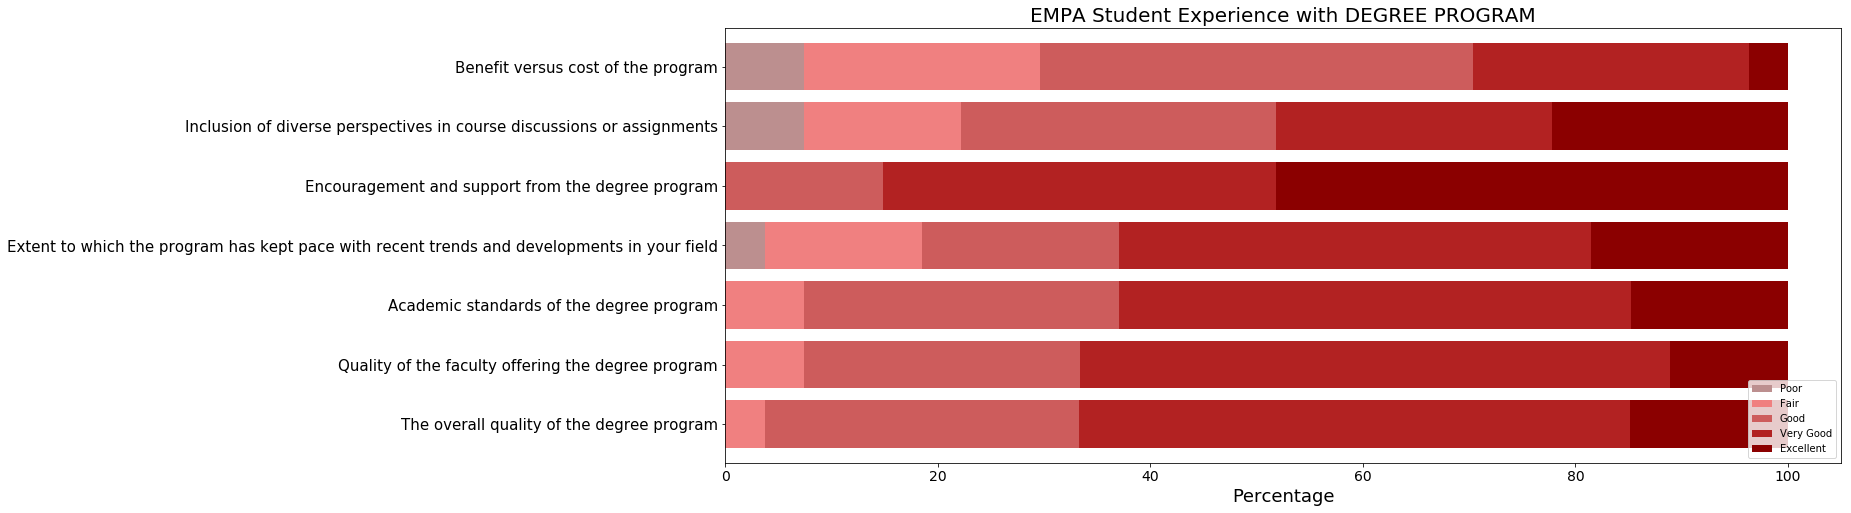

In [8]:
fig = plt.figure(frameon=False)
colors=['rosybrown','lightcoral','indianred','firebrick','darkred']
ax=df_empa1.plot.barh(y=df_empa1.columns,stacked=True,figsize=(20,8),width=0.8,fontsize=14,color=colors)
ax.set_yticklabels(['The overall quality of the degree program','Quality of the faculty offering the degree program', 'Academic standards of the degree program', 'Extent to which the program has kept pace with recent trends and developments in your field', 'Encouragement and support from the degree program', 'Inclusion of diverse perspectives in course discussions or assignments', 'Benefit versus cost of the program'],fontsize=15)
ax.set_title("EMPA Student Experience with DEGREE PROGRAM",fontsize=20)
ax.set_xlabel('Percentage',fontsize=18)

Text(0.5,1,'Others Student Experience with DEGREE PROGRAM')

<Figure size 432x288 with 0 Axes>

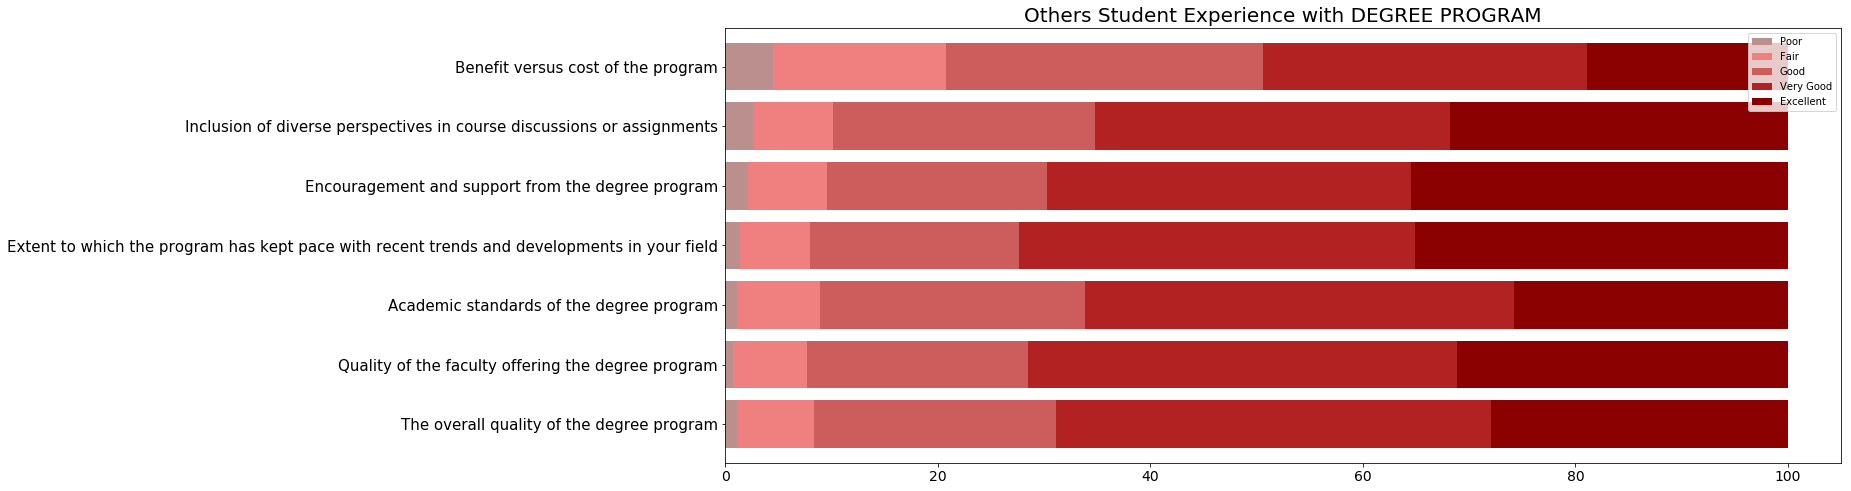

In [9]:
df_others=df[(df.major!='EMPA')]
df_others
df_others1=df_others.iloc[:,0:7].apply(pd.Series.value_counts)
df_others1 = df_others1.replace(np.nan, 0)
df_others1=round(df_others1/df_others1.sum()*100,2)
df_others1=df_others1.transpose()
df_others1=df_others1[['Poor','Fair','Good','Very Good','Excellent']]
fig = plt.figure(frameon=False)
colors=['rosybrown','lightcoral','indianred','firebrick','darkred']
ax=df_others1.plot.barh(y=df_empa1.columns,stacked=True,figsize=(20,8),width=0.8,fontsize=14,color=colors)
ax.set_yticklabels(['The overall quality of the degree program','Quality of the faculty offering the degree program', 'Academic standards of the degree program', 'Extent to which the program has kept pace with recent trends and developments in your field', 'Encouragement and support from the degree program', 'Inclusion of diverse perspectives in course discussions or assignments', 'Benefit versus cost of the program'],fontsize=15)
ax.set_title("Others Student Experience with DEGREE PROGRAM",fontsize=20)

In [11]:
df_others1

,Poor,Fair,Good,Very Good,Excellent
Q3_1,1.22,7.09,22.80,40.92,27.98
Q3_2,0.78,6.89,20.86,40.30,31.17
Q3_3,1.09,7.80,24.92,40.40,25.79
Q3_4,1.42,6.57,19.70,37.26,35.04
Q3_5,2.15,7.42,20.69,34.26,35.48
Q3_6,2.70,7.48,24.64,33.38,31.81
Q3_7,4.50,16.27,29.86,30.43,18.94


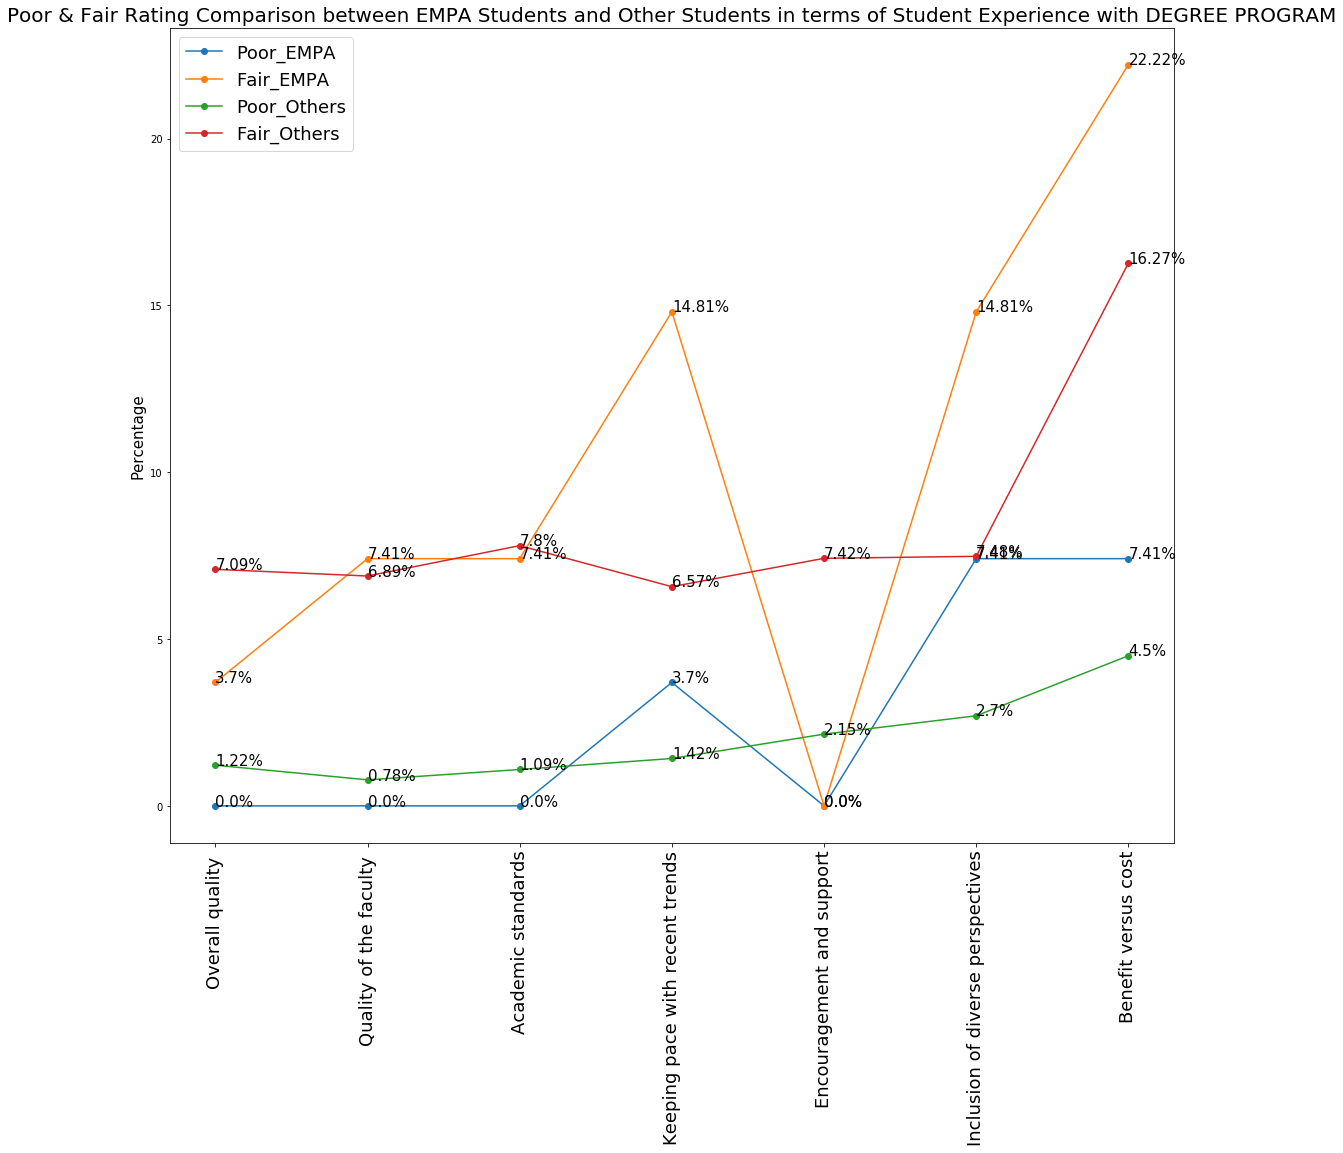

In [12]:
df_e=df_empa1.drop(['Excellent','Good','Very Good'], axis=1)
df_e.columns=['Poor_EMPA','Fair_EMPA']
df_o=df_others1.drop(['Excellent','Good','Very Good'], axis=1)
df_o.columns=['Poor_Others','Fair_Others']
df_eo=pd.concat([df_e,df_o], axis=1,sort=False)
ax=df_eo.plot(marker='o',figsize=(18,15))
ax.set_xticklabels(['0','Overall quality ','Quality of the faculty ', 'Academic standards', 'Keeping pace with recent trends', 'Encouragement and support', 'Inclusion of diverse perspectives', 'Benefit versus cost'],rotation=90,fontsize=18)
ax.legend(prop=dict(size=18))
ax.set_ylabel('Percentage',fontsize=15)
ax.set_title("Poor & Fair Rating Comparison between EMPA Students and Other Students in terms of Student Experience with DEGREE PROGRAM",fontsize=20)
for i, txt in enumerate(np.array(df_eo.Fair_EMPA)):
    ax.annotate(str(txt)+'%',xy=(i, txt),fontsize=15)
for i, txt in enumerate(np.array(df_eo.Fair_Others)):
    ax.annotate(str(txt)+'%',xy=(i, txt),fontsize=15)
for i, txt in enumerate(np.array(df_eo.Poor_Others)):
    ax.annotate(str(txt)+'%',xy=(i, txt),fontsize=15)
for i, txt in enumerate(np.array(df_eo.Poor_EMPA)):
    ax.annotate(str(txt)+'%',xy=(i, txt),fontsize=15)

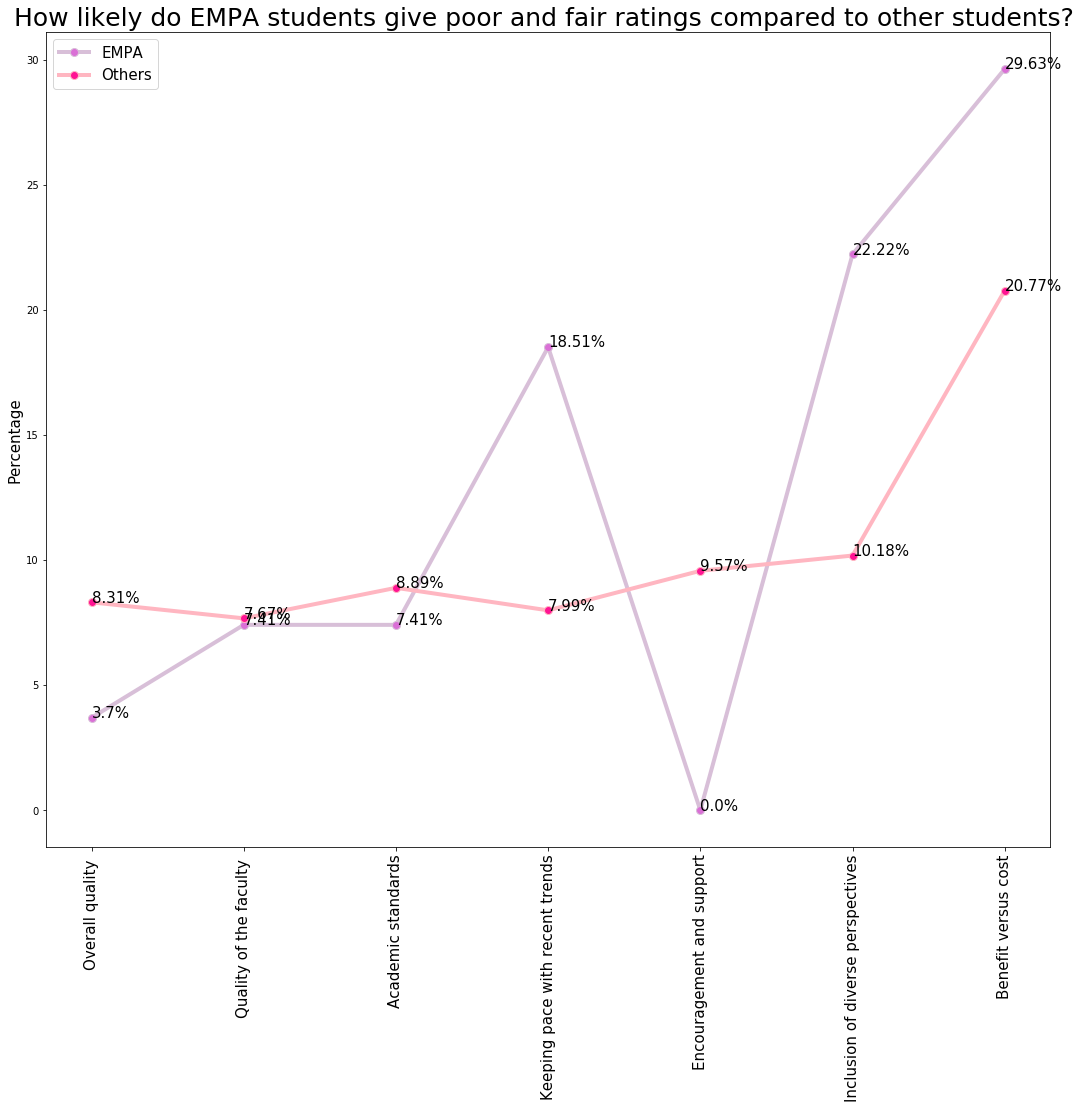

In [13]:
df_eo['EMPA']=df_eo['Fair_EMPA']+df_eo['Poor_EMPA']
df_eo['Others']=df_eo['Fair_Others']+df_eo['Poor_Others']
fig = plt.figure(frameon=False,figsize=(18,15))
plt.plot( 'EMPA', data=df_eo, marker='o', markerfacecolor='orchid', markersize=8, color='thistle', linewidth=4)
plt.plot( 'Others', data=df_eo, marker='o', markerfacecolor='deeppink', markersize=8, color='lightpink', linewidth=4)
plt.legend(fontsize=15)
plt.title('How likely do EMPA students give poor and fair ratings compared to other students? ',fontsize=25)
plt.ylabel('Percentage',fontsize=15)
plt.xticks(np.arange(7), ('Overall quality ','Quality of the faculty ', 'Academic standards', 'Keeping pace with recent trends', 'Encouragement and support', 'Inclusion of diverse perspectives', 'Benefit versus cost'),rotation=90,fontsize=15)
for i, txt in enumerate(np.array(df_eo.EMPA)):
    plt.annotate(str(round(txt,2))+'%',xy=(i, txt),fontsize=15)
for i, txt in enumerate(np.array(df_eo.Others)):
    plt.annotate(str(round(txt,2))+'%',xy=(i, txt),fontsize=15)

**Highlight**<br>
Generally, the EMPA program quality is above average, however, it needs the most improvement in the following category:<br> 
1. Inclusion of diverse perspectives (political, religious, racial/ethnic, gender, sexual orientation, etc.) in course discussions or assignments<br>
2. Extent to which the program has kept pace with recent trends and developments in your field
3. Benefit versus cost of the program

**Please rate your degree program in each of the following areas:(Q6)**

In [23]:
df= pd.read_csv("C:\\Users\\gtang\\Desktop\\MES\\MES_TT.csv")
#df.dropna(subset=['Q6_1','Q6_2','Q6_3','Q6_4','Q6_5','Q6_6','Q6_7','Q6_8','Q6_9','Q6_10','Q6_11','Q6_12','Q6_13','Q6_14','Q6_15'],axis=0,inplace=True) 

In [24]:
df_empa=df[(df.major=='EMPA')]

In [25]:
df_empa1=df_empa.iloc[:,7:22].apply(pd.Series.value_counts)
#df_empa1=round(df_empa1/34,2)
df_empa1 = df_empa1.replace(np.nan, 0)
df_empa1=round(df_empa1/df_empa1.sum()*100,2)
df_empa1=df_empa1.transpose()
df_empa1=df_empa1[['Poor','Fair','Good','Very Good','Excellent']]
df_empa1

,Poor,Fair,Good,Very Good,Excellent
Q6_1,0.00,3.70,7.41,62.96,25.93
Q6_2,0.00,11.11,18.52,59.26,11.11
Q6_3,0.00,11.11,29.63,48.15,11.11
Q6_4,0.00,3.70,29.63,37.04,29.63
Q6_5,8.00,12.00,24.00,24.00,32.00
Q6_6,8.00,8.00,16.00,36.00,32.00
Q6_7,0.00,7.41,22.22,44.44,25.93
Q6_8,0.00,4.00,20.00,44.00,32.00
Q6_9,0.00,10.53,26.32,42.11,21.05
Q6_10,4.35,4.35,47.83,21.74,21.74


Text(0.5,1,'EMPA Student Experience with DEGREE PROGRAM')

<Figure size 432x288 with 0 Axes>

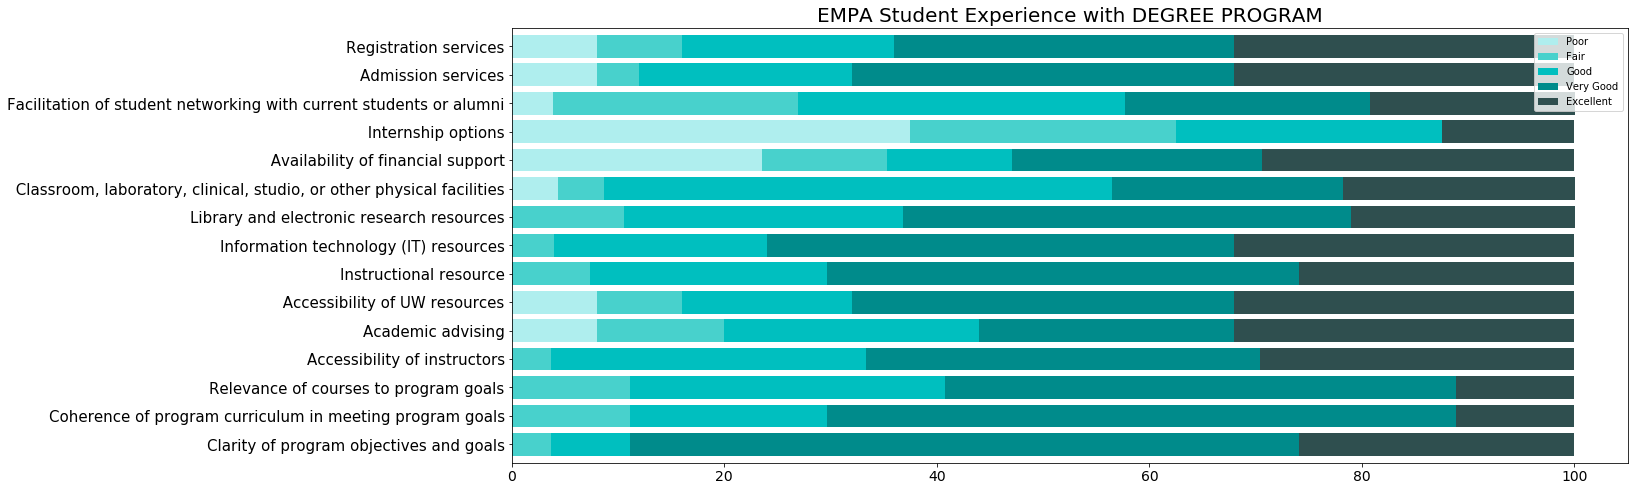

In [26]:
fig = plt.figure(frameon=False)
colors=['paleturquoise','mediumturquoise','c','darkcyan','darkslategrey']
ax=df_empa1.plot.barh(y=df_empa1.columns,stacked=True,figsize=(20,8),width=0.8,fontsize=14,color=colors)
ax.set_yticklabels(['Clarity of program objectives and goals','Coherence of program curriculum in meeting program goals', 'Relevance of courses to program goals', 'Accessibility of instructors','Academic advising',' Accessibility of UW resources','Instructional resource','Information technology (IT) resources','Library and electronic research resources',' Classroom, laboratory, clinical, studio, or other physical facilities',' Availability of financial support',' Internship options','Facilitation of student networking with current students or alumni','Admission services','Registration services'],fontsize=15)
ax.set_title("EMPA Student Experience with DEGREE PROGRAM",fontsize=20)


Text(0.5,1,'Other Student Experience with DEGREE PROGRAM')

<Figure size 432x288 with 0 Axes>

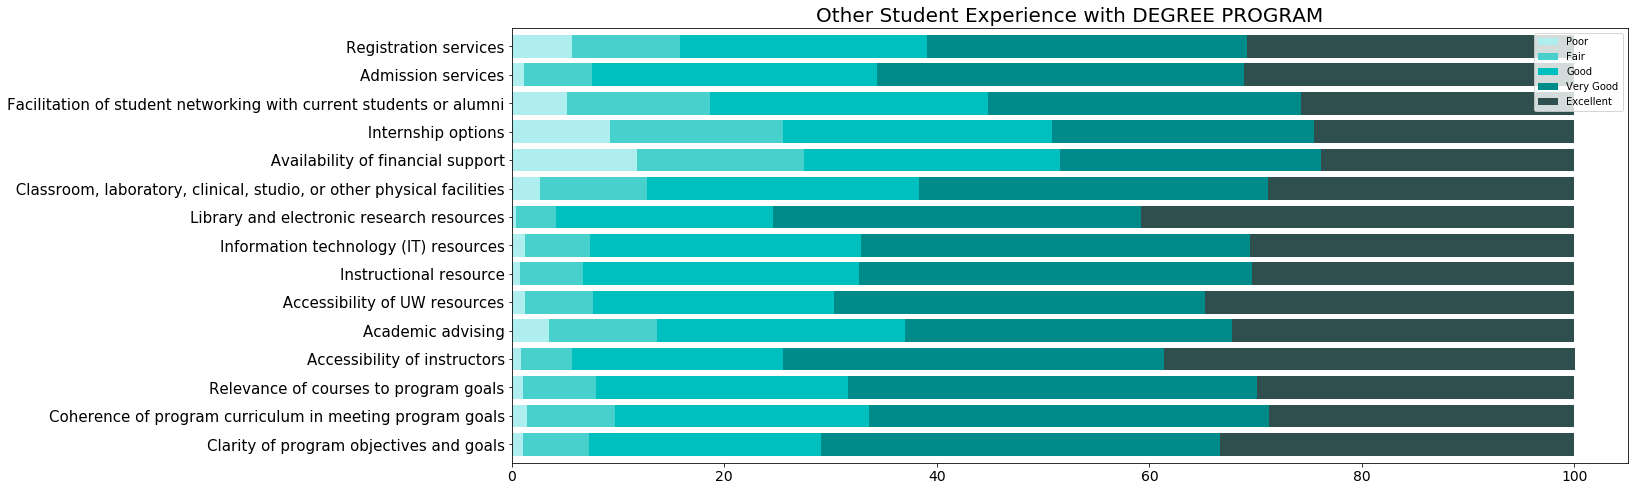

In [27]:
df_others=df[(df.major!='EMPA')]
df_others1=df_others.iloc[:,7:22].apply(pd.Series.value_counts)
df_others1 = df_others1.replace(np.nan, 0)
df_others1=round(df_others1/df_others1.sum()*100,2)
df_others1=df_others1.transpose()
df_others1=df_others1[['Poor','Fair','Good','Very Good','Excellent']]
fig = plt.figure(frameon=False)
colors=['paleturquoise','mediumturquoise','c','darkcyan','darkslategrey']
ax=df_others1.plot.barh(y=df_others1.columns,stacked=True,figsize=(20,8),width=0.8,fontsize=14,color=colors)
ax.set_yticklabels(['Clarity of program objectives and goals','Coherence of program curriculum in meeting program goals', 'Relevance of courses to program goals', 'Accessibility of instructors','Academic advising',' Accessibility of UW resources','Instructional resource','Information technology (IT) resources','Library and electronic research resources',' Classroom, laboratory, clinical, studio, or other physical facilities',' Availability of financial support',' Internship options','Facilitation of student networking with current students or alumni','Admission services','Registration services'],fontsize=15)
ax.set_title("Other Student Experience with DEGREE PROGRAM",fontsize=20)

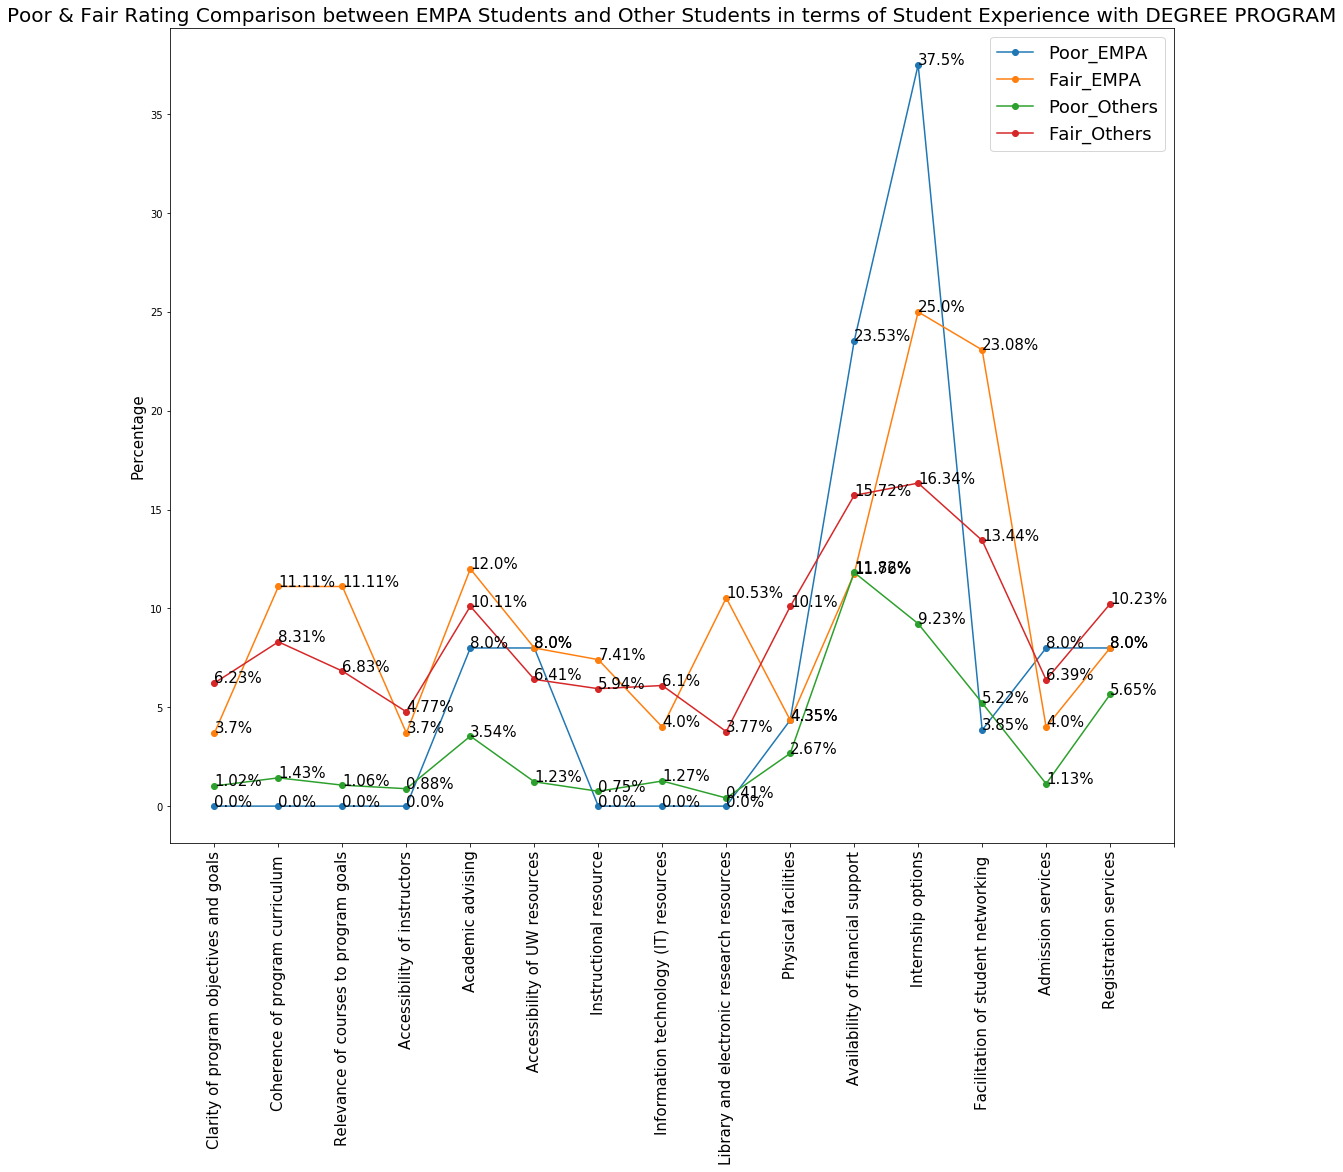

In [33]:
df_e=df_empa1.drop(['Excellent','Good','Very Good'], axis=1)
df_e.columns=['Poor_EMPA','Fair_EMPA']
df_o=df_others1.drop(['Excellent','Good','Very Good'], axis=1)
df_o.columns=['Poor_Others','Fair_Others']
df_eo=pd.concat([df_e,df_o], axis=1,sort=False)
ax=df_eo.plot(marker='o',figsize=(18,15))
tick_labels = tuple(df_eo.index)
x_max = int(max(plt.xticks()[0]))
plt.xticks(range(0, x_max), tick_labels, rotation=45) 
ax.set_xticklabels(['Clarity of program objectives and goals','Coherence of program curriculum ', 'Relevance of courses to program goals', 'Accessibility of instructors','Academic advising',' Accessibility of UW resources','Instructional resource','Information technology (IT) resources','Library and electronic research resources',' Physical facilities',' Availability of financial support',' Internship options','Facilitation of student networking ','Admission services','Registration services'],rotation=90,fontsize=15)
ax.legend(prop=dict(size=18))
ax.set_ylabel('Percentage',fontsize=15)
ax.set_title("Poor & Fair Rating Comparison between EMPA Students and Other Students in terms of Student Experience with DEGREE PROGRAM",fontsize=20)
for i, txt in enumerate(np.array(df_eo.Fair_EMPA)):
    ax.annotate(str(txt)+'%',xy=(i, txt),fontsize=15)
for i, txt in enumerate(np.array(df_eo.Fair_Others)):
    ax.annotate(str(txt)+'%',xy=(i, txt),fontsize=15)
for i, txt in enumerate(np.array(df_eo.Poor_Others)):
    ax.annotate(str(txt)+'%',xy=(i, txt),fontsize=15)
for i, txt in enumerate(np.array(df_eo.Poor_EMPA)):
    ax.annotate(str(txt)+'%',xy=(i, txt),fontsize=15)

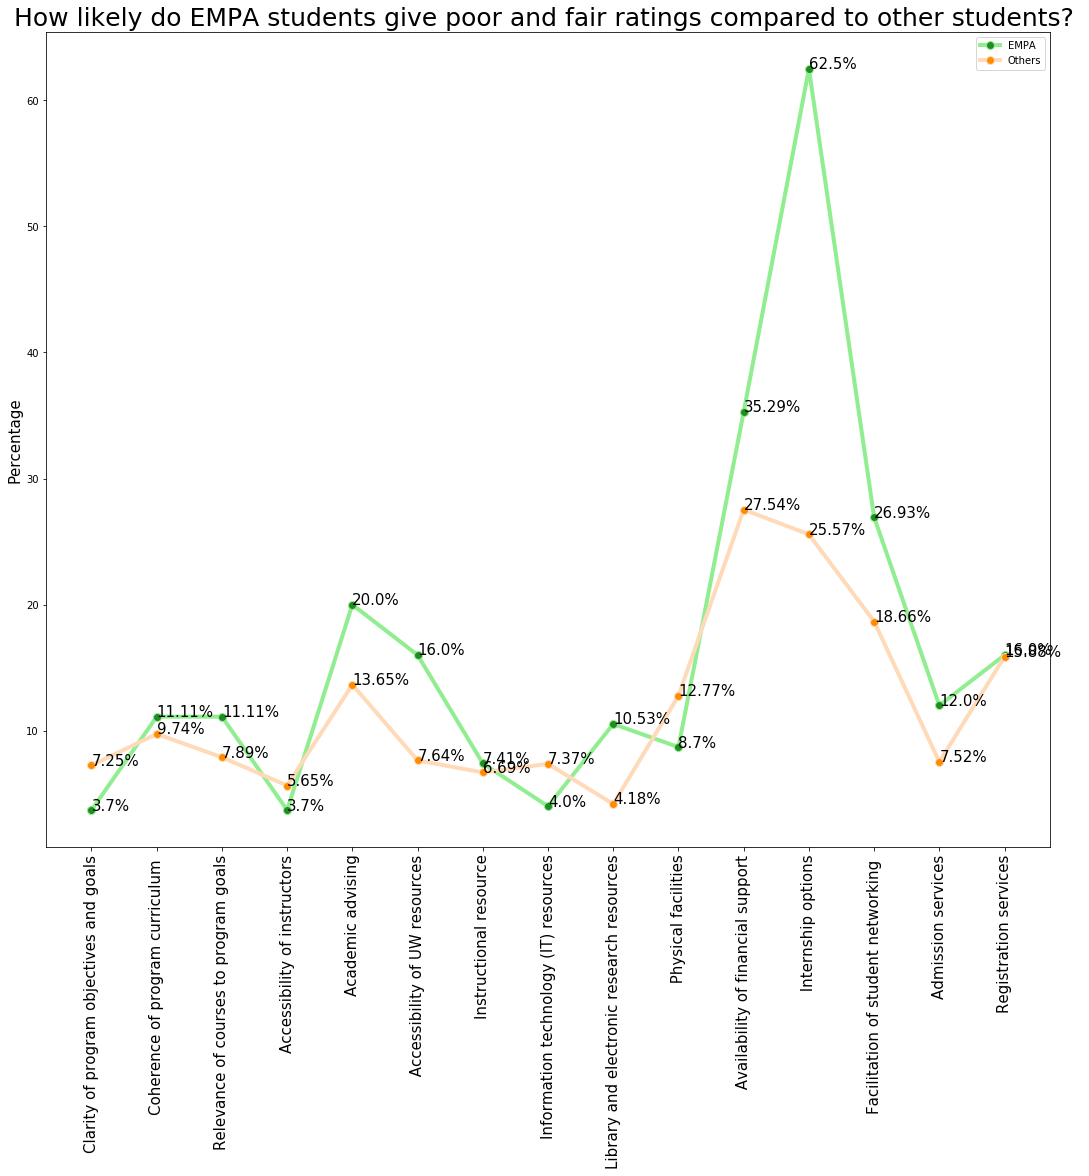

In [32]:
df_eo['EMPA']=df_eo['Fair_EMPA']+df_eo['Poor_EMPA']
df_eo['Others']=df_eo['Fair_Others']+df_eo['Poor_Others']
fig = plt.figure(frameon=False,figsize=(18,15))
plt.plot( 'EMPA', data=df_eo, marker='o', markerfacecolor='forestgreen', markersize=8, color='lightgreen', linewidth=4)
plt.plot( 'Others', data=df_eo, marker='o', markerfacecolor='darkorange', markersize=8, color='peachpuff', linewidth=4)
plt.legend()
plt.title('How likely do EMPA students give poor and fair ratings compared to other students? ',fontsize=25)
plt.ylabel('Percentage',fontsize=15)
plt.xticks(np.arange(15), ('Clarity of program objectives and goals','Coherence of program curriculum ', 'Relevance of courses to program goals', 'Accessibility of instructors','Academic advising',' Accessibility of UW resources','Instructional resource','Information technology (IT) resources','Library and electronic research resources',' Physical facilities',' Availability of financial support',' Internship options','Facilitation of student networking ','Admission services','Registration services'),rotation=90,fontsize=15)
for i, txt in enumerate(np.array(df_eo.EMPA)):
    plt.annotate(str(round(txt,2))+'%',xy=(i, txt),fontsize=15)
for i, txt in enumerate(np.array(df_eo.Others)):
    plt.annotate(str(round(txt,2))+'%',xy=(i, txt),fontsize=15)

**Highlight**<br>
It is very obvious that EMPA program received the negative ratings in *internship options* the most.
Other aspects that we need to pay close attention to are: *availability of financial support, student networking opportunities,and research resources*.

** What extent do you agree or disagree with the following statements? (Q12)**

In [34]:
df= pd.read_csv("C:\\Users\\gtang\\Desktop\\MES\\MES_NN.csv")
df.dropna(axis=0,inplace=True) 
df.iloc[:, : 10].astype('int64').dtypes
df_empa=pd.DataFrame(df[(df.major=='EMPA')].mean())
df_others=pd.DataFrame(df[(df.major!='EMPA')].mean())
df_eo=pd.concat([df_empa,df_others], axis=1,sort=False)
df_eo.columns=(['EMPA','Others'])
df_eo=df_eo.transpose()
df_eo=df_eo.reset_index()
df_eo.rename(columns={'index':'group','Q12_1':' Students in my program are treated with respect by faculty','Q12_2':' The intellectual climate of my program is positive','Q12_3':''},inplace=True)

Text(0.5,1.05,'The Average Opinion of EMPA & Other Students')

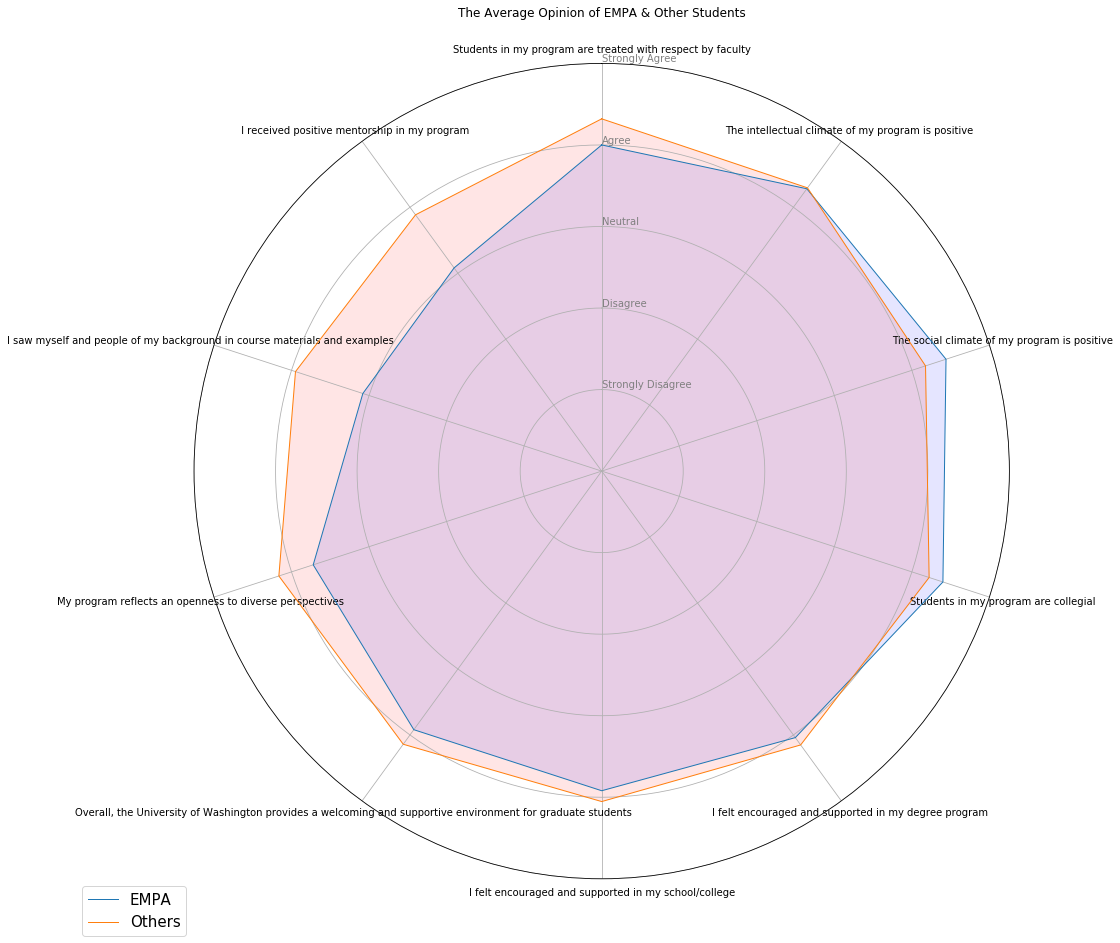

In [35]:
from math import pi
# ------- PART 1: Create background
 
# number of variable
categories=list(df_eo)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig = plt.figure(frameon=False,figsize=(18,15))
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
values=['Students in my program are treated with respect by faculty','The intellectual climate of my program is positive','The social climate of my program is positive','Students in my program are collegial','I felt encouraged and supported in my degree program','I felt encouraged and supported in my school/college','Overall, the University of Washington provides a welcoming and supportive environment for graduate students','My program reflects an openness to diverse perspectives','I saw myself and people of my background in course materials and examples',' I received positive mentorship in my program']
plt.xticks(angles[:-1],values)
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3,4,5],['Strongly Disagree','Disagree','Neutral','Agree','Strongly Agree'], color="grey", size=10)
plt.ylim(0,5)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df_eo.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="EMPA")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df_eo.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Others")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0, 0),fontsize=15)
plt.title("The Average Opinion of EMPA & Other Students")

**Highlight**<br>
As we can tell from the above spider chart, we can tell that EMPA program has done a good job in providing *positive intellectual climate*, *positive social climate*, and *students in the program are very collegial*.
However, the EMPA program is relatively weak in providing *positive mentorship and an openness to diverse perspectives*. The *course materials and examples* are not that relatable for students.

In [37]:
df= pd.read_csv("C:\\Users\\gtang\\Desktop\\MES\\MES_TT.csv")
#df.dropna(subset=['Q12_1','Q12_2','Q12_3','Q12_4','Q12_5','Q12_6','Q12_7','Q12_8','Q12_9','Q12_10'],axis=0,inplace=True)  
df_empa=df[(df.major=='EMPA')]
df_empa1=df[(df.major=='EMPA')].iloc[:,22:32].apply(pd.Series.value_counts)
df_empa1 = df_empa1.replace(np.nan, 0)
df_empa1=round(df_empa1/df_empa1.sum()*100,2)
df_empa1=df_empa1.transpose()
df_empa1=df_empa1[['Strongly Disagree','Disagree','Neither Agree nor Disagree','Agree','Strongly Agree']]

In [38]:
df_others=df[(df.major!='EMPA')]
df_others1=df_others.iloc[:,22:32].apply(pd.Series.value_counts)
df_others1 = df_others1.replace(np.nan, 0)
df_others1=round(df_others1/df_others1.sum()*100,2)
df_others1=df_others1.transpose()
df_others1=df_others1[['Strongly Disagree','Disagree','Neither Agree nor Disagree','Agree','Strongly Agree']]

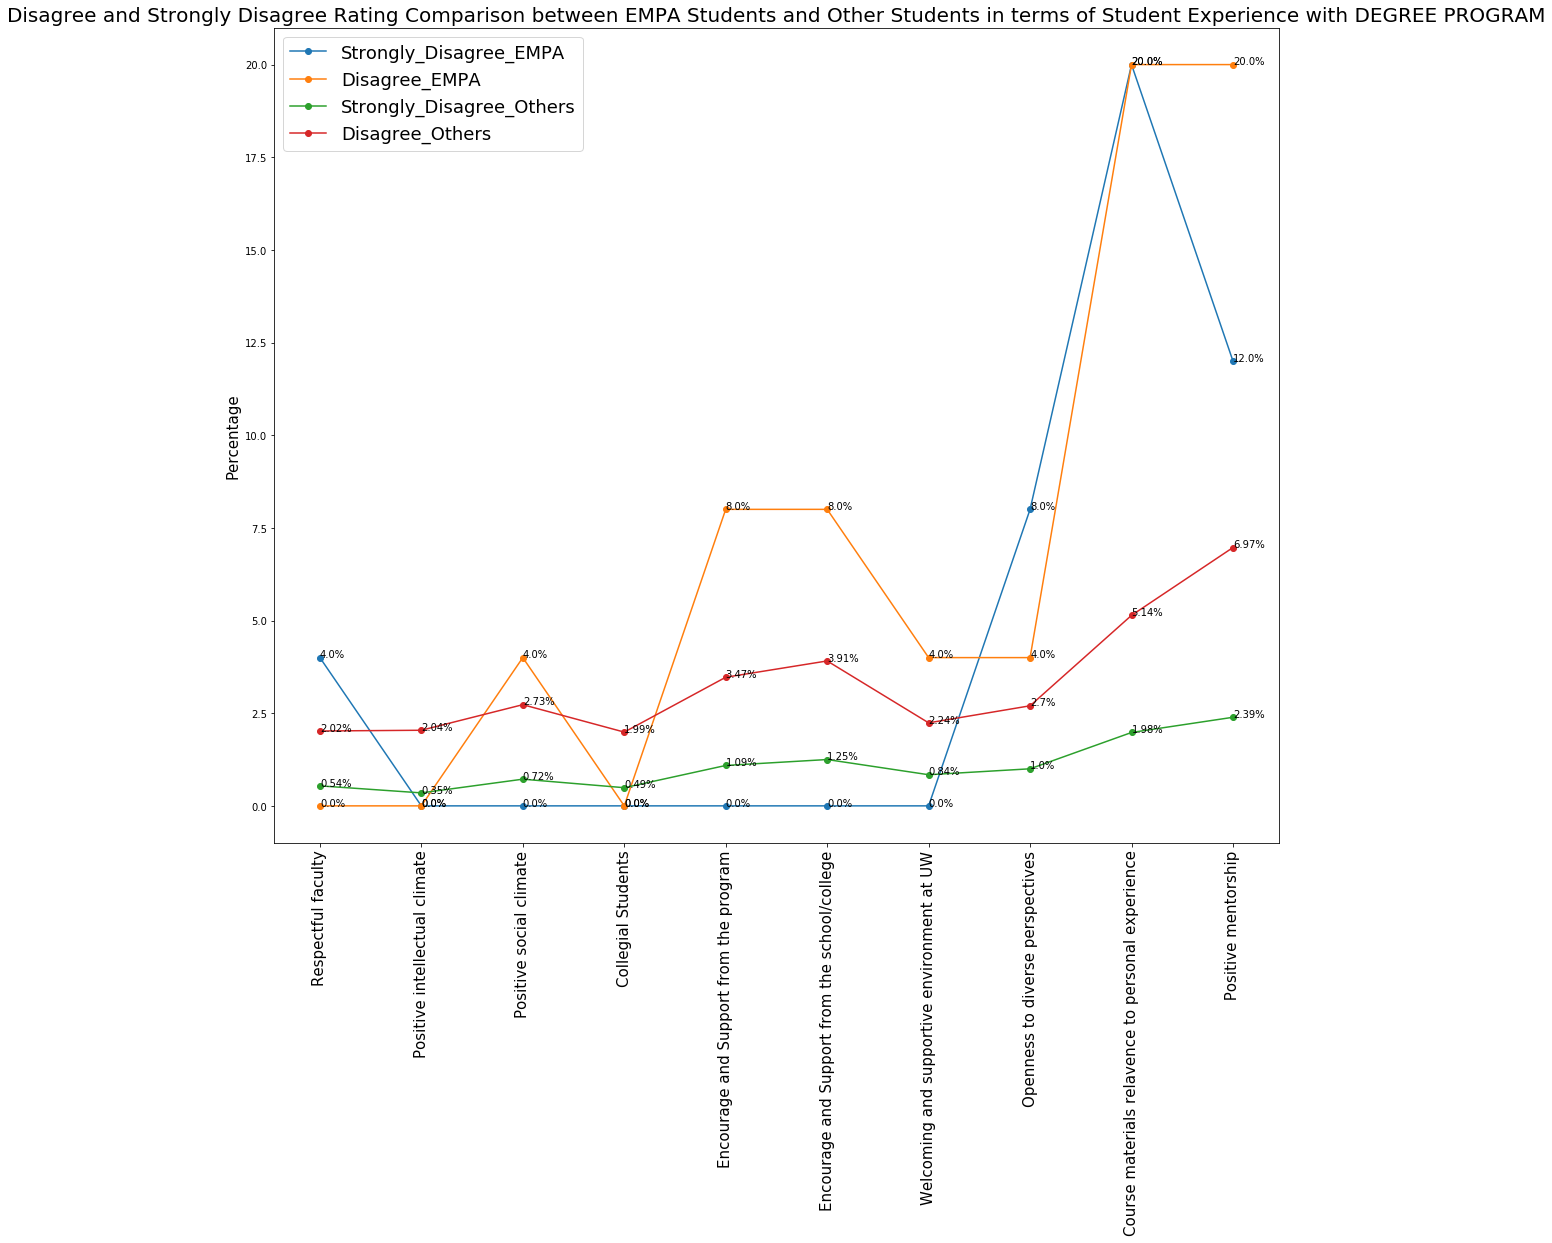

In [39]:
df_e=df_empa1.drop(['Agree','Strongly Agree','Neither Agree nor Disagree'], axis=1)
df_e.columns=['Strongly_Disagree_EMPA','Disagree_EMPA']
df_o=df_others1.drop(['Agree','Strongly Agree','Neither Agree nor Disagree'], axis=1)
df_o.columns=['Strongly_Disagree_Others','Disagree_Others']
df_eo=pd.concat([df_e,df_o], axis=1,sort=False)
ax=df_eo.plot(marker='o',figsize=(18,15))
tick_labels = tuple(df_eo.index)
x_max = int(max(plt.xticks()[0]))
plt.xticks(range(0, x_max), tick_labels, rotation=45) 
ax.set_xticklabels(['Respectful faculty','Positive intellectual climate','Positive social climate','Collegial Students','Encourage and Support from the program','Encourage and Support from the school/college','Welcoming and supportive environment at UW','Openness to diverse perspectives','Course materials relavence to personal experience',' Positive mentorship'],rotation=90,fontsize=15)
ax.legend(prop=dict(size=18))
ax.set_ylabel('Percentage',fontsize=15)
ax.set_title("Disagree and Strongly Disagree Rating Comparison between EMPA Students and Other Students in terms of Student Experience with DEGREE PROGRAM",fontsize=20)
for i, txt in enumerate(np.array(df_eo.Strongly_Disagree_EMPA)):
    ax.annotate(str(txt)+'%',xy=(i, txt))
for i, txt in enumerate(np.array(df_eo.Disagree_Others)):
    ax.annotate(str(txt)+'%',xy=(i, txt))
for i, txt in enumerate(np.array(df_eo.Strongly_Disagree_Others)):
    ax.annotate(str(txt)+'%',xy=(i, txt))
for i, txt in enumerate(np.array(df_eo.Disagree_EMPA)):
    ax.annotate(str(txt)+'%',xy=(i, txt))

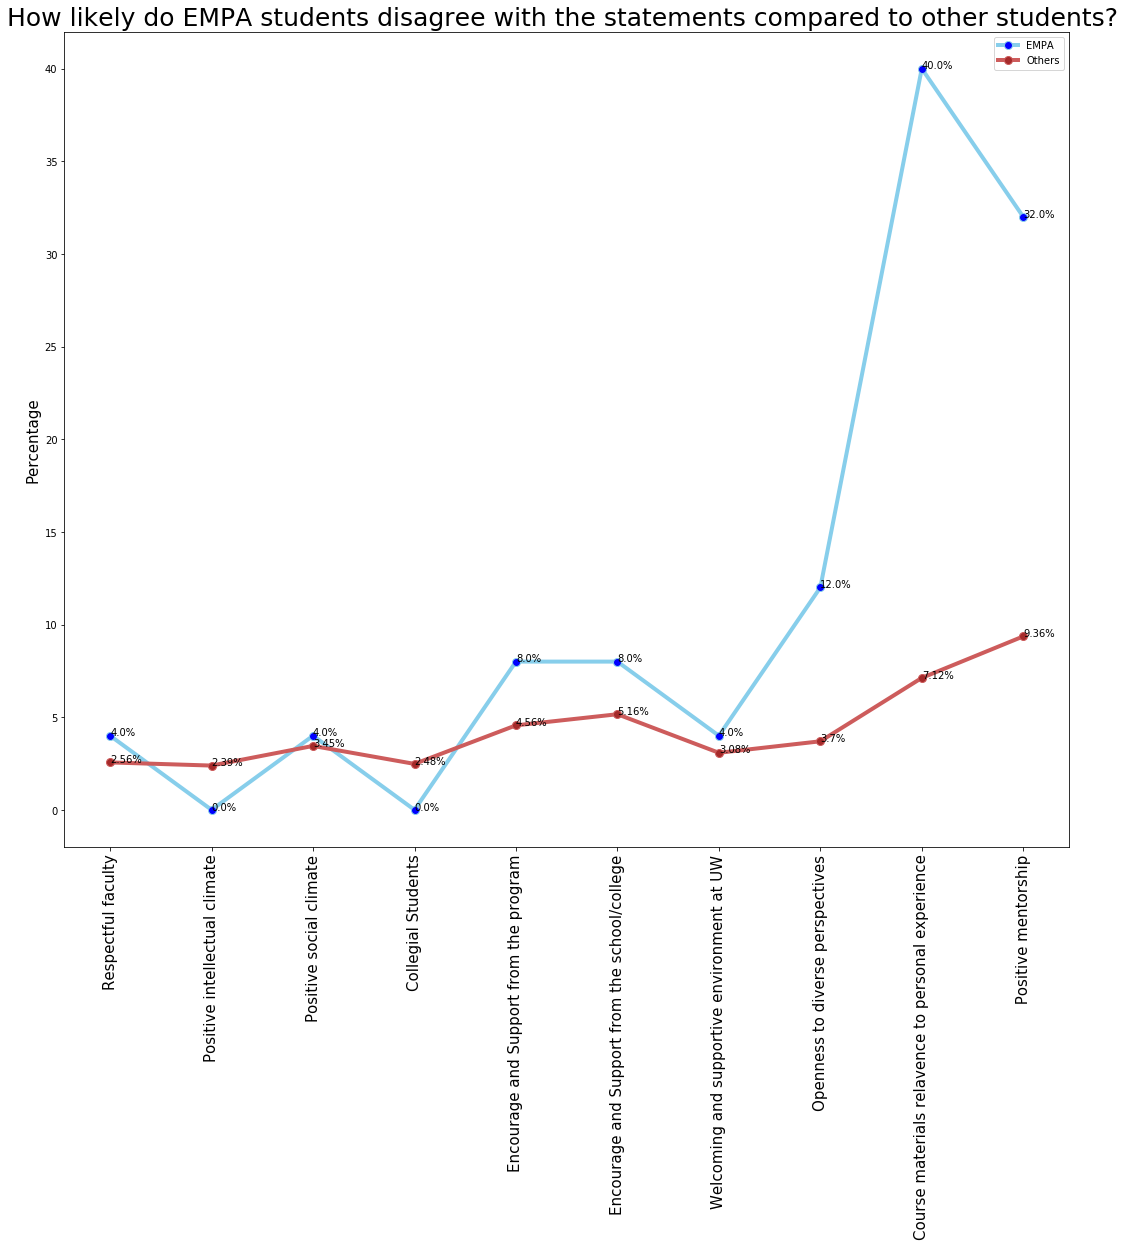

In [40]:
df_eo['EMPA']=df_eo['Disagree_EMPA']+df_eo['Strongly_Disagree_EMPA']
df_eo['Others']=df_eo['Disagree_Others']+df_eo['Strongly_Disagree_Others']
fig = plt.figure(frameon=False,figsize=(18,15))
plt.plot( 'EMPA', data=df_eo, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=4)
plt.plot( 'Others', data=df_eo, marker='o', markerfacecolor='brown', markersize=8, color='indianred', linewidth=4)
plt.legend()
plt.title('How likely do EMPA students disagree with the statements compared to other students? ',fontsize=25)
plt.ylabel('Percentage',fontsize=15)
plt.xticks(np.arange(10), ('Respectful faculty','Positive intellectual climate','Positive social climate','Collegial Students','Encourage and Support from the program','Encourage and Support from the school/college','Welcoming and supportive environment at UW','Openness to diverse perspectives','Course materials relavence to personal experience',' Positive mentorship'),rotation=90,fontsize=15)
for i, txt in enumerate(np.array(df_eo.EMPA)):
    plt.annotate(str(round(txt,2))+'%',xy=(i, txt))
for i, txt in enumerate(np.array(df_eo.Others)):
    plt.annotate(str(round(txt,2))+'%',xy=(i, txt))

**Hightlight**<br>
When we take a closer look at the disagreement rate in the above line chart,
the EMPA students tend to disagree more with the following statements: 
(from the highest disagreement percentage difference between EMPA students and Other students to the lowest)<br>
1.I saw myself and people of my background in course materials and examples<br>
2.I received positive mentorship in my program<br>
3.My program reflects an openness to diverse perspectives (political, religious, racial/ethnic, gender, sexual orientation, etc.)<br>
4.I felt encouraged and supported in my school/college<br>
5.Overall, the University of Washington provides a welcoming and supportive environment for graduate students

**t-score and Statistical significance**